<h1>Analiza sentymentów poslkich polityków w obliczu wojny w Ukrainie 2022 <h1>

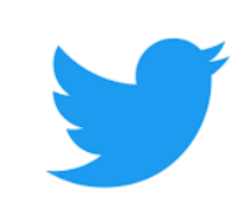

<b4>Twitter to narzedzie, gdzie politycy najczęściej wypisują swoje opinie i pokazują co mysla publicznie. W tym projekcie postaram się'
zbadać sentyment polityków .Najpierw pobiorę tweety polskich polityków (zescrapuję je z Twittera), a nastepnie dokonam analizy sentymentu
oraz przedstawię ciekawe statystyki-np. najbardziej wrogi tweet oraz kto z polityków pisze njabrdziej wrogo.<b4>

<h3>Przedstawię dwa  różne metody wydobywania sentymentu:<h3>

(1) Metoda oparta na regułach: Na tym etapie leksykony i predefiniowane zasady są wykorzystywane do identyfikacji sentymentu  użytkowników na dany temat.Uzyje tutaj pakietu sentimentpl, który jest jedynym pakietem w internecie, który znalazłam do badania czy dany tweet był pozytywny czy negatywny.

(2) Metoda oparta na uczeniu maszynowym: W tym podejściu budujemy klasyfikator uczący się maszynowo, który nadaje  polaryzację tematu na podstawie wytrenowanych danych(dane treningowe beda juz zaklasyfikowane czy sa wrogie czy pozytywne).Na podstawie danych treningowych nasz algorytm (regresja logistyczna) nauczy sie klasyfikowac nastroj politykow.



<h2>UWAGA<h2>

<b2>Wybór polityków jest przypadkowy, szukałam takich, u których tweety sa w większości w języku Polskim, dlatego
m.in odrzuciłam pana prezydenta Dudę.

<h2>Importuje pakiety <h2>

In [1]:
#Pobieranie danych z tweetera
import tweepy as tw
import requests



import pandas as pd
 
#Wordcloud
import re
import numpy as np

# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

import string
import os
import sys

import twitter
import requests
import matplotlib.pyplot as plt
import json
import boto3



import time
from flair.models import TextClassifier
from flair.data import Sentence

<h2>Teraz pobieram tweety z twittera za pomocą specjalnego API. W tym celu musze mieć konto Tweeter Developer i pobrać specjalne klucze<h2>

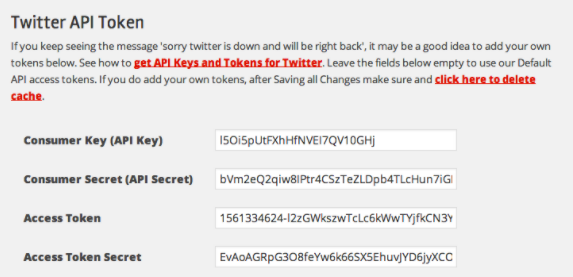





Każdy musi założyć swoje własne konto,jednak jeśli chcesz, możesz uzyć moich tokenów poniżej. To konto tweeter jest robocze i nie używam go.

In [2]:

bearer_token='AAAAAAAAAAAAAAAAAAAAAFcFaQEAAAAAyQh1%2BNuFxB%2FQDeCq6cWiLlX%2Fn5Q%3DPXwVlmBDpDfjapn6N5OKYMynHh3AGFCLRAVMrOpqtMaKETauNy'
consumer_key='4VIMmuzgs7aUI4OZGDmIH1kj0'
consumer_secret='Xpch1lyx8X1eZJHwxRKrg0ptzlpuF9t2P4FiUqcQadkHIOebhZ'
access_token='1503680347782926338-hREEsxh2LrpNoYShuV4aWc0OpLbZMU'
access_token_secret='eSdc46FQCjmIeHmdepVzSSSiCG2GxchTMF3XLB4yl0X54'

<h2>Importowanie tweetow polskich politykow<h2>

In [3]:

import tweepy as tw
import requests

client = tw.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

<h2>Jacek Sasin<h2>

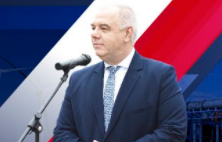

In [4]:
#Wybierz nick 
query = '@SasinJacek -is:retweet'

# wczytaj 100 tweetow
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [5]:
import pandas as pd

# Zapisz dane jako słownik
tweets_dict = tweets.json() 

# Wyciągnij wartość "data" ze słownika
tweets_data = tweets_dict['data'] 

# Transforrmacja do dataframu
df = pd.json_normalize(tweets_data) 

In [6]:
df_sasin=df
df_sasin

,id,created_at,text,author_id
0,1505257225840992261,2022-03-19T18:57:43.000Z,@hbiskupski @SasinJacek @MAPGOVPL @se_pl @Supe...,1496815112753229895
1,1505230864178946050,2022-03-19T17:12:58.000Z,@SpirOxy @AZdzitowiecki @MorawieckiM @SasinJac...,1273980628082589696
2,1505192107585249281,2022-03-19T14:38:58.000Z,Prezes #PGNiG Paweł Majewski w @RadiowaJedynka...,829642415719985152
3,1505186597003739138,2022-03-19T14:17:04.000Z,"Dostęp do broni regulują, a de facto ogranicza...",563612114
4,1505178840871616514,2022-03-19T13:46:15.000Z,"@Bart_Wielinski Qrwa, @SasinJacek, napisz, że ...",919928455843762177
...,...,...,...,...
95,1504754282394013699,2022-03-18T09:39:12.000Z,@RzecznikORLEN @Dariusz_Jonski @PKN_ORLEN @Dan...,1499777340796194816
96,1504753762522615822,2022-03-18T09:37:08.000Z,@Dariusz_Jonski @PKN_ORLEN @DanielObajtek @Sas...,851868007672492033
97,1504751571476877313,2022-03-18T09:28:26.000Z,@Dariusz_Jonski @PKN_ORLEN @DanielObajtek @Sas...,1480522779569147908
98,1504749963393355805,2022-03-18T09:22:02.000Z,@Dariusz_Jonski @PKN_ORLEN @DanielObajtek @Sas...,926074200619732994


<h2>Ustawienie nazwiska polityka zamiast id <h2>

Na profilu pana Sasina postowali tez inni użytkownicy. Ja zbadam tu sentyment ogólnie całego tweetera danego polityka, więc 
uogólnię ze za każdego tweeta jest obecny właściciel konta.

In [7]:
import pandas as pd


def replace(df, columns, values):
    for one_column, one_value in zip(columns, values):
        df[one_column] = one_value

    return df

replace(df_sasin, ["author_id"], ["Sasin"])

,id,created_at,text,author_id
0,1505257225840992261,2022-03-19T18:57:43.000Z,@hbiskupski @SasinJacek @MAPGOVPL @se_pl @Supe...,Sasin
1,1505230864178946050,2022-03-19T17:12:58.000Z,@SpirOxy @AZdzitowiecki @MorawieckiM @SasinJac...,Sasin
2,1505192107585249281,2022-03-19T14:38:58.000Z,Prezes #PGNiG Paweł Majewski w @RadiowaJedynka...,Sasin
3,1505186597003739138,2022-03-19T14:17:04.000Z,"Dostęp do broni regulują, a de facto ogranicza...",Sasin
4,1505178840871616514,2022-03-19T13:46:15.000Z,"@Bart_Wielinski Qrwa, @SasinJacek, napisz, że ...",Sasin
...,...,...,...,...
95,1504754282394013699,2022-03-18T09:39:12.000Z,@RzecznikORLEN @Dariusz_Jonski @PKN_ORLEN @Dan...,Sasin
96,1504753762522615822,2022-03-18T09:37:08.000Z,@Dariusz_Jonski @PKN_ORLEN @DanielObajtek @Sas...,Sasin
97,1504751571476877313,2022-03-18T09:28:26.000Z,@Dariusz_Jonski @PKN_ORLEN @DanielObajtek @Sas...,Sasin
98,1504749963393355805,2022-03-18T09:22:02.000Z,@Dariusz_Jonski @PKN_ORLEN @DanielObajtek @Sas...,Sasin


<h2>Donald Tusk<h2>

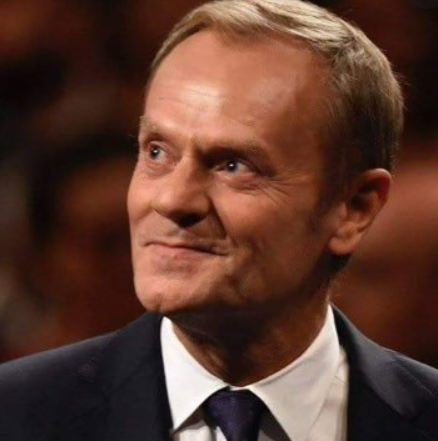

In [8]:

query = 'from:donaldtusk -is:retweet'


tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [9]:
import pandas as pd

# 
tweets_dict = tweets.json() 

# 
tweets_data = tweets_dict['data'] 

# 
df = pd.json_normalize(tweets_data)

In [10]:
df_tusk=df
df_tusk

,text,id,created_at,author_id
0,"Dzisiaj jest z nami bohaterski mer, bohaterski...",1505136042994716675,2022-03-19T10:56:11.000Z,375146901
1,Siejecie nienawiść między Polakami w czasie wo...,1503465014367301642,2022-03-14T20:16:07.000Z,375146901


In [11]:
replace(df_tusk, ["author_id"], ["Tusk"])
df_tusk

,text,id,created_at,author_id
0,"Dzisiaj jest z nami bohaterski mer, bohaterski...",1505136042994716675,2022-03-19T10:56:11.000Z,Tusk
1,Siejecie nienawiść między Polakami w czasie wo...,1503465014367301642,2022-03-14T20:16:07.000Z,Tusk


<h2>Krystyna Pawlowicz<h2>

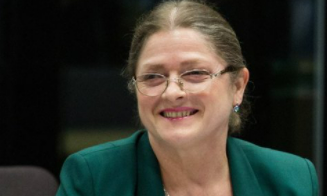

In [12]:
# 
query = '@KrystPawlowicz'

# 
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)


In [13]:
# 
tweets_dict = tweets.json() 

# 
tweets_data = tweets_dict['data'] 

# 
df = pd.json_normalize(tweets_data)



In [14]:
df_pawlo=df
df_pawlo


,created_at,text,id,author_id
0,2022-03-19T19:33:24.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505266207112450053,2184199892
1,2022-03-19T19:33:11.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505266149520547843,4015502903
2,2022-03-19T19:31:43.000Z,@KrystPawlowicz @sjastrzebowski @Duke_Nukem_PL...,1505265782468587522,95050553
3,2022-03-19T19:30:17.000Z,@Jakub11433 @radvollus355 @AndrzejDuda @Morawi...,1505265420382650370,824343135019008000
4,2022-03-19T19:30:10.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505265392796770304,2249119584
...,...,...,...,...
95,2022-03-19T18:11:59.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505245715311771650,1500405313115197440
96,2022-03-19T18:10:14.000Z,@KrystPawlowicz @PiotrMuller @Bernard_pl Żeby ...,1505245276512174082,1379808523777933321
97,2022-03-19T18:09:24.000Z,@Elbieta96608116 @KrystPawlowicz Nigdy żaden k...,1505245066465619975,1445375852779290632
98,2022-03-19T18:07:38.000Z,"RT @KrystPawlowicz: To,co od razu rzuca się w ...",1505244620787232778,3364126253


In [15]:
import pandas as pd


def replace(df, columns, values):
    for one_column, one_value in zip(columns, values):
        df[one_column] = one_value

    return df

replace(df_pawlo, ["author_id"], ["Pawłowicz"])



,created_at,text,id,author_id
0,2022-03-19T19:33:24.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505266207112450053,Pawłowicz
1,2022-03-19T19:33:11.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505266149520547843,Pawłowicz
2,2022-03-19T19:31:43.000Z,@KrystPawlowicz @sjastrzebowski @Duke_Nukem_PL...,1505265782468587522,Pawłowicz
3,2022-03-19T19:30:17.000Z,@Jakub11433 @radvollus355 @AndrzejDuda @Morawi...,1505265420382650370,Pawłowicz
4,2022-03-19T19:30:10.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505265392796770304,Pawłowicz
...,...,...,...,...
95,2022-03-19T18:11:59.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505245715311771650,Pawłowicz
96,2022-03-19T18:10:14.000Z,@KrystPawlowicz @PiotrMuller @Bernard_pl Żeby ...,1505245276512174082,Pawłowicz
97,2022-03-19T18:09:24.000Z,@Elbieta96608116 @KrystPawlowicz Nigdy żaden k...,1505245066465619975,Pawłowicz
98,2022-03-19T18:07:38.000Z,"RT @KrystPawlowicz: To,co od razu rzuca się w ...",1505244620787232778,Pawłowicz


In [16]:
df_pawlo

,created_at,text,id,author_id
0,2022-03-19T19:33:24.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505266207112450053,Pawłowicz
1,2022-03-19T19:33:11.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505266149520547843,Pawłowicz
2,2022-03-19T19:31:43.000Z,@KrystPawlowicz @sjastrzebowski @Duke_Nukem_PL...,1505265782468587522,Pawłowicz
3,2022-03-19T19:30:17.000Z,@Jakub11433 @radvollus355 @AndrzejDuda @Morawi...,1505265420382650370,Pawłowicz
4,2022-03-19T19:30:10.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505265392796770304,Pawłowicz
...,...,...,...,...
95,2022-03-19T18:11:59.000Z,RT @radvollus355: .@AndrzejDuda @MorawieckiM @...,1505245715311771650,Pawłowicz
96,2022-03-19T18:10:14.000Z,@KrystPawlowicz @PiotrMuller @Bernard_pl Żeby ...,1505245276512174082,Pawłowicz
97,2022-03-19T18:09:24.000Z,@Elbieta96608116 @KrystPawlowicz Nigdy żaden k...,1505245066465619975,Pawłowicz
98,2022-03-19T18:07:38.000Z,"RT @KrystPawlowicz: To,co od razu rzuca się w ...",1505244620787232778,Pawłowicz


<h2>Macierewicz<h2>

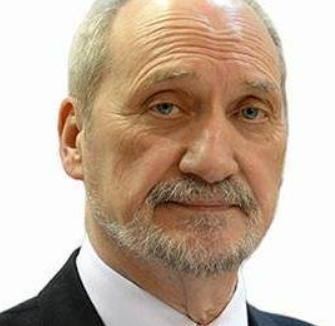

In [17]:
# 
query = 'Macierewicz_A -is:retweet'

# 
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)



In [18]:
# 
tweets_dict = tweets.json() 

#
tweets_data = tweets_dict['data'] 

# 
df = pd.json_normalize(tweets_data)

In [19]:
df_Macierewicz=df
df_Macierewicz


,text,author_id,id,created_at
0,@BABartusiak @adamkozlowski5 @amazgula @J23514...,2328271236,1505264449132847107,2022-03-19T19:26:25.000Z
1,@RepublikaTV @Macierewicz_A Jak to usłyszą z o...,1462362325810356225,1505264026091147275,2022-03-19T19:24:44.000Z
2,@Macierewicz_A Kup parówki.,568942254,1505262086083035147,2022-03-19T19:17:02.000Z
3,@faflunin @Tekla90568239Mi @piotr_weglarz @Pla...,2924623706,1505261026736054276,2022-03-19T19:12:49.000Z
4,@nieugiety_60 @faflunin @piotr_weglarz @Platfo...,1455942144879960067,1505254987840036870,2022-03-19T18:48:50.000Z
...,...,...,...,...
95,@johnsmiths74 @AndrzejDuda @Macierewicz_A No p...,1246788110035423232,1505167671997911044,2022-03-19T13:01:52.000Z
96,@PolskieRadio24 @Macierewicz_A Polecam lekturę...,536488858,1505167639475335168,2022-03-19T13:01:44.000Z
97,@jurasj52 @urwany @Macierewicz_A Które fakty? ...,3980111181,1505166680833601537,2022-03-19T12:57:56.000Z
98,I to mówi głąb @MorawieckiM który do spółki @M...,1134747337723711489,1505166570133368835,2022-03-19T12:57:29.000Z


In [20]:
replace(df_Macierewicz, ["author_id"], ["Macierewicz"])
df_Macierewicz

,text,author_id,id,created_at
0,@BABartusiak @adamkozlowski5 @amazgula @J23514...,Macierewicz,1505264449132847107,2022-03-19T19:26:25.000Z
1,@RepublikaTV @Macierewicz_A Jak to usłyszą z o...,Macierewicz,1505264026091147275,2022-03-19T19:24:44.000Z
2,@Macierewicz_A Kup parówki.,Macierewicz,1505262086083035147,2022-03-19T19:17:02.000Z
3,@faflunin @Tekla90568239Mi @piotr_weglarz @Pla...,Macierewicz,1505261026736054276,2022-03-19T19:12:49.000Z
4,@nieugiety_60 @faflunin @piotr_weglarz @Platfo...,Macierewicz,1505254987840036870,2022-03-19T18:48:50.000Z
...,...,...,...,...
95,@johnsmiths74 @AndrzejDuda @Macierewicz_A No p...,Macierewicz,1505167671997911044,2022-03-19T13:01:52.000Z
96,@PolskieRadio24 @Macierewicz_A Polecam lekturę...,Macierewicz,1505167639475335168,2022-03-19T13:01:44.000Z
97,@jurasj52 @urwany @Macierewicz_A Które fakty? ...,Macierewicz,1505166680833601537,2022-03-19T12:57:56.000Z
98,I to mówi głąb @MorawieckiM który do spółki @M...,Macierewicz,1505166570133368835,2022-03-19T12:57:29.000Z


<h2>Kurski<h2>

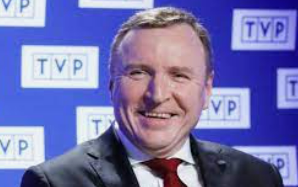

In [21]:
# 
query = 'KurskiPL -is:retweet'

# 
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [22]:
# 
tweets_dict = tweets.json() 

# 
tweets_data = tweets_dict['data'] 

# 
df = pd.json_normalize(tweets_data)

In [23]:
df_Kurski=df
df_Kurski

,id,author_id,created_at,text
0,1505266103232376833,1369593848675135492,2022-03-19T19:33:00.000Z,#Minela20\nPANIE @AKlarenbach PAN SIĘ ZLITUJE ...
1,1505265981903540229,1226570249614610432,2022-03-19T19:32:31.000Z,@KurskiPL 😁😂🤣😂🤣 https://t.co/rQLJVK5lAb
2,1505265689296351244,1369593848675135492,2022-03-19T19:31:21.000Z,#Minela20\nSzanowni Państwo @KurskiPL @Olechow...
3,1505265131390963719,1369593848675135492,2022-03-19T19:29:08.000Z,#Minela20\nSzanowni Państwo @KurskiPL @Olechow...
4,1505264684051615744,1369593848675135492,2022-03-19T19:27:21.000Z,#Minela20\nApeluję żeby bojkotować TV @KurskiP...
...,...,...,...,...
95,1505077536547643398,1542544020,2022-03-19T07:03:42.000Z,@PawelWronskigw @KurskiPL Na dowód putinizacji...
96,1505075610233806851,818841512465334273,2022-03-19T06:56:03.000Z,@AsiaNietop @KurskiPL Zenka ci puści
97,1505074660161077253,1488513317215903751,2022-03-19T06:52:16.000Z,@KurskiPL Żebyś Ty tak za każde kłamstwo przep...
98,1505073853629968387,1090336377022173184,2022-03-19T06:49:04.000Z,"Te @KurskiPL we no co ogarnij, bo nimom dzie o..."


In [24]:
replace(df_Kurski, ["author_id"], ["Kurski"])
df_Kurski

,id,author_id,created_at,text
0,1505266103232376833,Kurski,2022-03-19T19:33:00.000Z,#Minela20\nPANIE @AKlarenbach PAN SIĘ ZLITUJE ...
1,1505265981903540229,Kurski,2022-03-19T19:32:31.000Z,@KurskiPL 😁😂🤣😂🤣 https://t.co/rQLJVK5lAb
2,1505265689296351244,Kurski,2022-03-19T19:31:21.000Z,#Minela20\nSzanowni Państwo @KurskiPL @Olechow...
3,1505265131390963719,Kurski,2022-03-19T19:29:08.000Z,#Minela20\nSzanowni Państwo @KurskiPL @Olechow...
4,1505264684051615744,Kurski,2022-03-19T19:27:21.000Z,#Minela20\nApeluję żeby bojkotować TV @KurskiP...
...,...,...,...,...
95,1505077536547643398,Kurski,2022-03-19T07:03:42.000Z,@PawelWronskigw @KurskiPL Na dowód putinizacji...
96,1505075610233806851,Kurski,2022-03-19T06:56:03.000Z,@AsiaNietop @KurskiPL Zenka ci puści
97,1505074660161077253,Kurski,2022-03-19T06:52:16.000Z,@KurskiPL Żebyś Ty tak za każde kłamstwo przep...
98,1505073853629968387,Kurski,2022-03-19T06:49:04.000Z,"Te @KurskiPL we no co ogarnij, bo nimom dzie o..."


<h2>Zbigniew Ziobro <h2>

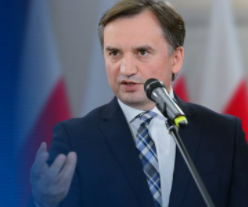

In [25]:
# 
query = 'ZiobroPL -is:retweet'

# 
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [26]:
# 
tweets_dict = tweets.json() 

# 
tweets_data = tweets_dict['data'] 

# 
df = pd.json_normalize(tweets_data)

In [27]:
df_Ziobro=df
df_Ziobro

,created_at,author_id,text,id
0,2022-03-19T19:30:17.000Z,824343135019008000,@Jakub11433 @radvollus355 @AndrzejDuda @Morawi...,1505265420382650370
1,2022-03-19T19:26:21.000Z,1358138291300802560,@MarekWysmulek @tw_wolfgang @Leszczyna @Krzysz...,1505264431114170373
2,2022-03-19T19:21:16.000Z,550435867,@P_Juszszczysyn .@AndrzejDuda @donaldtusk @Zio...,1505263150328860675
3,2022-03-19T19:20:03.000Z,1401248928482349056,@eelays @MS_GOV_PL @ZiobroPL @KarimKhanQC Goń ...,1505262843918176263
4,2022-03-19T19:19:39.000Z,363587532,@PNisztor Powtarzam: weźcie przykład z kk Esto...,1505262745113042947
...,...,...,...,...
95,2022-03-19T16:38:08.000Z,1426807381095223301,@szymon_holownia Kiedy wprowadzićie opiekę nap...,1505222096128991238
96,2022-03-19T16:37:57.000Z,1426807381095223301,@jflibicki @nowePSL Ja przjołem do mojego kraj...,1505222051283587079
97,2022-03-19T16:35:26.000Z,1498924490436366337,@KopiecMaciej @ZiobroPL @__Lewica @Lewica_News...,1505221420053323778
98,2022-03-19T16:33:10.000Z,1236028626916827136,@nina07676953 @radvollus355 @AndrzejDuda @Mora...,1505220849007222785


In [28]:
replace(df_Ziobro, ["author_id"], ["Ziobro"])
df_Ziobro

,created_at,author_id,text,id
0,2022-03-19T19:30:17.000Z,Ziobro,@Jakub11433 @radvollus355 @AndrzejDuda @Morawi...,1505265420382650370
1,2022-03-19T19:26:21.000Z,Ziobro,@MarekWysmulek @tw_wolfgang @Leszczyna @Krzysz...,1505264431114170373
2,2022-03-19T19:21:16.000Z,Ziobro,@P_Juszszczysyn .@AndrzejDuda @donaldtusk @Zio...,1505263150328860675
3,2022-03-19T19:20:03.000Z,Ziobro,@eelays @MS_GOV_PL @ZiobroPL @KarimKhanQC Goń ...,1505262843918176263
4,2022-03-19T19:19:39.000Z,Ziobro,@PNisztor Powtarzam: weźcie przykład z kk Esto...,1505262745113042947
...,...,...,...,...
95,2022-03-19T16:38:08.000Z,Ziobro,@szymon_holownia Kiedy wprowadzićie opiekę nap...,1505222096128991238
96,2022-03-19T16:37:57.000Z,Ziobro,@jflibicki @nowePSL Ja przjołem do mojego kraj...,1505222051283587079
97,2022-03-19T16:35:26.000Z,Ziobro,@KopiecMaciej @ZiobroPL @__Lewica @Lewica_News...,1505221420053323778
98,2022-03-19T16:33:10.000Z,Ziobro,@nina07676953 @radvollus355 @AndrzejDuda @Mora...,1505220849007222785


<h2>Krzysztof Bosak<h2>

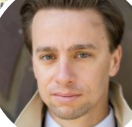

In [29]:
# 
query = 'krzysztofbosak -is:retweet'

# 
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [30]:
# 
tweets_dict = tweets.json() 

# 
tweets_data = tweets_dict['data'] 

# 
df = pd.json_normalize(tweets_data)

In [31]:
df_Bosak=df
df_Bosak

,id,text,created_at,author_id
0,1505265512250499076,@krzysztofbosak Jak jest ich tylu to gdzie mie...,2022-03-19T19:30:39.000Z,1482722746052325376
1,1505264136187428864,"@SzJadczak @krzysztofbosak ma problem, ale zap...",2022-03-19T19:25:11.000Z,1232572280871538690
2,1505263899599380481,@7DzienTygodnia @joannakluzik @krzysztofbosak ...,2022-03-19T19:24:14.000Z,1324378092
3,1505260948298379273,@RobertWinnicki @krzysztofbosak od wielu lat ż...,2022-03-19T19:12:31.000Z,1062405611458101248
4,1505257721330900995,@7DzienTygodnia @OnetWiadomosci @joannakluzik ...,2022-03-19T18:59:41.000Z,1504354134073434119
...,...,...,...,...
95,1505173074093789184,@7DzienTygodnia @joannakluzik @krzysztofbosak ...,2022-03-19T13:23:20.000Z,962238524790657024
96,1505172269747912708,@7DzienTygodnia @joannakluzik @krzysztofbosak ...,2022-03-19T13:20:08.000Z,818528109754519552
97,1505171804138229761,@7DzienTygodnia @joannakluzik @krzysztofbosak ...,2022-03-19T13:18:17.000Z,1367877320
98,1505171462486953987,@7DzienTygodnia @joannakluzik @krzysztofbosak ...,2022-03-19T13:16:56.000Z,1436330566505349128


In [32]:
replace(df_Bosak, ["author_id"], ["Bosak"])
df_Bosak

,id,text,created_at,author_id
0,1505265512250499076,@krzysztofbosak Jak jest ich tylu to gdzie mie...,2022-03-19T19:30:39.000Z,Bosak
1,1505264136187428864,"@SzJadczak @krzysztofbosak ma problem, ale zap...",2022-03-19T19:25:11.000Z,Bosak
2,1505263899599380481,@7DzienTygodnia @joannakluzik @krzysztofbosak ...,2022-03-19T19:24:14.000Z,Bosak
3,1505260948298379273,@RobertWinnicki @krzysztofbosak od wielu lat ż...,2022-03-19T19:12:31.000Z,Bosak
4,1505257721330900995,@7DzienTygodnia @OnetWiadomosci @joannakluzik ...,2022-03-19T18:59:41.000Z,Bosak
...,...,...,...,...
95,1505173074093789184,@7DzienTygodnia @joannakluzik @krzysztofbosak ...,2022-03-19T13:23:20.000Z,Bosak
96,1505172269747912708,@7DzienTygodnia @joannakluzik @krzysztofbosak ...,2022-03-19T13:20:08.000Z,Bosak
97,1505171804138229761,@7DzienTygodnia @joannakluzik @krzysztofbosak ...,2022-03-19T13:18:17.000Z,Bosak
98,1505171462486953987,@7DzienTygodnia @joannakluzik @krzysztofbosak ...,2022-03-19T13:16:56.000Z,Bosak


<h2>Patryk Jaki<h2>

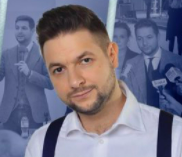

In [33]:
# 
query = 'PatrykJaki -is:retweet'

# 
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [34]:
# 
tweets_dict = tweets.json() 

# 
tweets_data = tweets_dict['data'] 

# 
df = pd.json_normalize(tweets_data)

In [35]:
df_Jaki=df
df_Jaki

,created_at,id,text,author_id
0,2022-03-19T19:29:38.000Z,1505265258830741513,@PatrykJaki Polska też finansuje,792216008627027968
1,2022-03-19T19:11:37.000Z,1505260722858737664,@GabiUcze7 @KlasaOhio @PatrykJaki Hahaha zabaw...,2297952616
2,2022-03-19T19:05:52.000Z,1505259274892570624,@PatrykJaki https://t.co/3Bh7vAlmlQ,890672086146052097
3,2022-03-19T19:03:35.000Z,1505258699832578050,"Przepraszam , czy beda wyciagniete konsekwencj...",371679615
4,2022-03-19T19:03:28.000Z,1505258672968060932,@PatrykJaki @Monika20943370 Nigdy nie wierz N...,929648562677403648
...,...,...,...,...
95,2022-03-19T13:03:07.000Z,1505167986298179585,@PatrykJaki Niemcy nie powinny nigdy robić pol...,1484869091567583232
96,2022-03-19T13:01:48.000Z,1505167657783508994,@PatrykJaki Hehe dresiarzu dupsko boli co? A j...,2558454704
97,2022-03-19T12:55:28.000Z,1505166060269486084,@PatrykJaki Oto zdrajcy w pełnej krasie.,1475026530053017600
98,2022-03-19T12:49:52.000Z,1505164653801922566,@MarioRebeliant @JanKulik5 @lis_tomasz @jacek_...,3293728149


In [36]:
replace(df_Jaki, ["author_id"], ["Jaki"])
df_Jaki

,created_at,id,text,author_id
0,2022-03-19T19:29:38.000Z,1505265258830741513,@PatrykJaki Polska też finansuje,Jaki
1,2022-03-19T19:11:37.000Z,1505260722858737664,@GabiUcze7 @KlasaOhio @PatrykJaki Hahaha zabaw...,Jaki
2,2022-03-19T19:05:52.000Z,1505259274892570624,@PatrykJaki https://t.co/3Bh7vAlmlQ,Jaki
3,2022-03-19T19:03:35.000Z,1505258699832578050,"Przepraszam , czy beda wyciagniete konsekwencj...",Jaki
4,2022-03-19T19:03:28.000Z,1505258672968060932,@PatrykJaki @Monika20943370 Nigdy nie wierz N...,Jaki
...,...,...,...,...
95,2022-03-19T13:03:07.000Z,1505167986298179585,@PatrykJaki Niemcy nie powinny nigdy robić pol...,Jaki
96,2022-03-19T13:01:48.000Z,1505167657783508994,@PatrykJaki Hehe dresiarzu dupsko boli co? A j...,Jaki
97,2022-03-19T12:55:28.000Z,1505166060269486084,@PatrykJaki Oto zdrajcy w pełnej krasie.,Jaki
98,2022-03-19T12:49:52.000Z,1505164653801922566,@MarioRebeliant @JanKulik5 @lis_tomasz @jacek_...,Jaki


<h2>Szymon Hołownia<h2>

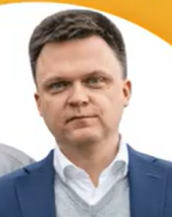

In [37]:
# 
query = 'szymon_holownia -is:retweet'

# 
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [38]:
# 
tweets_dict = tweets.json() 

# 
tweets_data = tweets_dict['data'] 

# 
df = pd.json_normalize(tweets_data)

In [39]:
df_Holownia=df
df_Holownia

,id,created_at,text,author_id
0,1505261940649693184,2022-03-19T19:16:27.000Z,@szymon_holownia @PKN_ORLEN Idijotyzmy jakich ...,1429451172251832320
1,1505254340117909510,2022-03-19T18:46:15.000Z,@Leszczyna Czas na reaktywację @Campus_Polska ...,1531208366
2,1505253635592269828,2022-03-19T18:43:27.000Z,@rraczkowska94 @trzaskowski_ Czas na reaktywac...,1531208366
3,1505251142774796294,2022-03-19T18:33:33.000Z,"@szymon_holownia @PL_2050 Nie jątrzcie ,nie w...",1327909161162727425
4,1505247741039026181,2022-03-19T18:20:02.000Z,@szymon_holownia @PKN_ORLEN proszę tankować w ...,92071055
...,...,...,...,...
95,1505177133345345539,2022-03-19T13:39:28.000Z,@EwaKopacz Kiedy wprowadzićie opiekę naprzemie...,1426807381095223301
96,1505177073048068101,2022-03-19T13:39:13.000Z,@EwaKopacz Kiedy wprowadzićie opiekę naprzemie...,1426807381095223301
97,1505176992261591041,2022-03-19T13:38:54.000Z,@EwaKopacz Kiedy wprowadzićie opiekę naprzemie...,1426807381095223301
98,1505176884698624003,2022-03-19T13:38:28.000Z,@EwaKopacz Kiedy wprowadzićie opiekę naprzemie...,1426807381095223301


In [40]:
replace(df_Holownia, ["author_id"], ["Holownia"])
df_Holownia

,id,created_at,text,author_id
0,1505261940649693184,2022-03-19T19:16:27.000Z,@szymon_holownia @PKN_ORLEN Idijotyzmy jakich ...,Holownia
1,1505254340117909510,2022-03-19T18:46:15.000Z,@Leszczyna Czas na reaktywację @Campus_Polska ...,Holownia
2,1505253635592269828,2022-03-19T18:43:27.000Z,@rraczkowska94 @trzaskowski_ Czas na reaktywac...,Holownia
3,1505251142774796294,2022-03-19T18:33:33.000Z,"@szymon_holownia @PL_2050 Nie jątrzcie ,nie w...",Holownia
4,1505247741039026181,2022-03-19T18:20:02.000Z,@szymon_holownia @PKN_ORLEN proszę tankować w ...,Holownia
...,...,...,...,...
95,1505177133345345539,2022-03-19T13:39:28.000Z,@EwaKopacz Kiedy wprowadzićie opiekę naprzemie...,Holownia
96,1505177073048068101,2022-03-19T13:39:13.000Z,@EwaKopacz Kiedy wprowadzićie opiekę naprzemie...,Holownia
97,1505176992261591041,2022-03-19T13:38:54.000Z,@EwaKopacz Kiedy wprowadzićie opiekę naprzemie...,Holownia
98,1505176884698624003,2022-03-19T13:38:28.000Z,@EwaKopacz Kiedy wprowadzićie opiekę naprzemie...,Holownia


<h2>Janusz Korwin-Mikke<h2>

In [41]:
# 
query = 'JkmMikke -is:retweet'

# get max. 10 tweets
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [42]:
# 
tweets_dict = tweets.json() 

# 
tweets_data = tweets_dict['data'] 

# 
df = pd.json_normalize(tweets_data)

In [43]:
df_Korwin=df
df_Korwin

,created_at,author_id,id,text
0,2022-03-19T19:36:12.000Z,1460700780101615622,1505266910006591488,"@JkmMikke ty,ziomek,skończ pierdolić już te ko..."
1,2022-03-19T19:36:08.000Z,1264894724617404417,1505266891438370816,@AsiaNietop @JkmMikke Prędzej pisze Mój kocha...
2,2022-03-19T19:35:32.000Z,1394577447660756992,1505266743840841738,@jakubiak_marek @JkmMikke Cenię sobie pana ale...
3,2022-03-19T19:34:45.000Z,1445999120850751493,1505266543327858688,"@oszolomjeden @JkmMikke Ale mi Pan dopiekł, oj..."
4,2022-03-19T19:34:42.000Z,1317563625482104833,1505266534419210244,@chilldu80071817 @KorolukM @JkmMikke Ty odpowi...
...,...,...,...,...
95,2022-03-19T19:14:27.000Z,1313873922501246977,1505261436976652289,@MarcinWu1980 @JkmMikke Dziambora.
96,2022-03-19T19:14:27.000Z,1172662367227961344,1505261435852632067,@JkmMikke Nie rozumiem fenomenu hejtowania Pan...
97,2022-03-19T19:14:21.000Z,1497632722369536001,1505261410737131521,@felix1313131313 @JkmMikke Zaparz sobie melisk...
98,2022-03-19T19:14:12.000Z,1183358016592240643,1505261373026148360,@KorolukM @JkmMikke Proponuję mówić Jego Ekskr...


In [44]:
replace(df_Korwin, ["author_id"], ["Korwin"])
df_Korwin

,created_at,author_id,id,text
0,2022-03-19T19:36:12.000Z,Korwin,1505266910006591488,"@JkmMikke ty,ziomek,skończ pierdolić już te ko..."
1,2022-03-19T19:36:08.000Z,Korwin,1505266891438370816,@AsiaNietop @JkmMikke Prędzej pisze Mój kocha...
2,2022-03-19T19:35:32.000Z,Korwin,1505266743840841738,@jakubiak_marek @JkmMikke Cenię sobie pana ale...
3,2022-03-19T19:34:45.000Z,Korwin,1505266543327858688,"@oszolomjeden @JkmMikke Ale mi Pan dopiekł, oj..."
4,2022-03-19T19:34:42.000Z,Korwin,1505266534419210244,@chilldu80071817 @KorolukM @JkmMikke Ty odpowi...
...,...,...,...,...
95,2022-03-19T19:14:27.000Z,Korwin,1505261436976652289,@MarcinWu1980 @JkmMikke Dziambora.
96,2022-03-19T19:14:27.000Z,Korwin,1505261435852632067,@JkmMikke Nie rozumiem fenomenu hejtowania Pan...
97,2022-03-19T19:14:21.000Z,Korwin,1505261410737131521,@felix1313131313 @JkmMikke Zaparz sobie melisk...
98,2022-03-19T19:14:12.000Z,Korwin,1505261373026148360,@KorolukM @JkmMikke Proponuję mówić Jego Ekskr...


<h2>Borys Budka<h2>

In [45]:
# 
query = 'bbudka -is:retweet'

# 
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [46]:
# 
tweets_dict = tweets.json() 

# 
tweets_data = tweets_dict['data'] 

# 
df = pd.json_normalize(tweets_data)

In [47]:
df_Budka=df
df_Budka

,created_at,author_id,text,id
0,2022-03-19T19:34:12.000Z,1501933238591234052,@swietokrzyskiPO @Platforma_org @NewsPlatforma...,1505266408229412873
1,2022-03-19T19:26:50.000Z,1501823522934505472,@KasTzinden @bbudka Pedał z kobietą. W czym zd...,1505264553411629064
2,2022-03-19T19:16:17.000Z,470555199,@IzabelaDeOpo @adam_abramczyk @MorawieckiM @JK...,1505261898631110656
3,2022-03-19T19:15:50.000Z,1336737811605622785,"Panie @donaldtusk , @bbudka @Platforma_org co ...",1505261782579007492
4,2022-03-19T19:13:16.000Z,1218048373074296834,@bbudka Tak! Wybitny lekarz i człowiek! A co n...,1505261139139211264
...,...,...,...,...
95,2022-03-19T16:02:59.000Z,1322442863305723904,@KLubnauer @beatax088 @MEIN_GOV_PL @Nowoczesna...,1505213251235291137
96,2022-03-19T15:55:09.000Z,839939904192851969,@LBalcerowicz @bbudka Lubisz PUTINA i jego pro...,1505211279178448899
97,2022-03-19T15:53:26.000Z,1362116347040325632,@NewsPlatforma @ciesielski_jan @bbudka To jest...,1505210850012975106
98,2022-03-19T15:44:53.000Z,1290599861017092096,@JanGrabiec @bbudka Ooo. donalda zaczyna mieć ...,1505208698523762691


In [48]:
replace(df_Budka, ["author_id"], ["Budka"])
df_Budka

,created_at,author_id,text,id
0,2022-03-19T19:34:12.000Z,Budka,@swietokrzyskiPO @Platforma_org @NewsPlatforma...,1505266408229412873
1,2022-03-19T19:26:50.000Z,Budka,@KasTzinden @bbudka Pedał z kobietą. W czym zd...,1505264553411629064
2,2022-03-19T19:16:17.000Z,Budka,@IzabelaDeOpo @adam_abramczyk @MorawieckiM @JK...,1505261898631110656
3,2022-03-19T19:15:50.000Z,Budka,"Panie @donaldtusk , @bbudka @Platforma_org co ...",1505261782579007492
4,2022-03-19T19:13:16.000Z,Budka,@bbudka Tak! Wybitny lekarz i człowiek! A co n...,1505261139139211264
...,...,...,...,...
95,2022-03-19T16:02:59.000Z,Budka,@KLubnauer @beatax088 @MEIN_GOV_PL @Nowoczesna...,1505213251235291137
96,2022-03-19T15:55:09.000Z,Budka,@LBalcerowicz @bbudka Lubisz PUTINA i jego pro...,1505211279178448899
97,2022-03-19T15:53:26.000Z,Budka,@NewsPlatforma @ciesielski_jan @bbudka To jest...,1505210850012975106
98,2022-03-19T15:44:53.000Z,Budka,@JanGrabiec @bbudka Ooo. donalda zaczyna mieć ...,1505208698523762691


<h2>Lubnauer<h2>

In [49]:
# 
query = 'KLubnauer -is:retweet'

# 
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [50]:
# 
tweets_dict = tweets.json() 

# 
tweets_data = tweets_dict['data'] 

# 
df = pd.json_normalize(tweets_data)

In [51]:
df_Lubnauer=df
df_Lubnauer

,id,author_id,created_at,text
0,1505264604137541634,950099313258127361,2022-03-19T19:27:02.000Z,@KLubnauer @Piechocinski patrząc na ciebie to ...
1,1505261898631110656,470555199,2022-03-19T19:16:17.000Z,@IzabelaDeOpo @adam_abramczyk @MorawieckiM @JK...
2,1505261002312531968,1464062292430053378,2022-03-19T19:12:44.000Z,@AnjaWagnerowa @KLubnauer @donaldtusk @NewsPla...
3,1505260788830904325,3996469301,2022-03-19T19:11:53.000Z,@KLubnauer @trzaskowski_ @NewsPlatforma @bbudk...
4,1505260627257925636,1497689249491075073,2022-03-19T19:11:14.000Z,@kiedd2 @m_szeflinski @DocZbyszek @joannactr @...
...,...,...,...,...
95,1505197847364395011,1293486882614116352,2022-03-19T15:01:46.000Z,@KLubnauer @donaldtusk @NewsPlatforma @trzasko...
96,1505197843262418954,1039584284946903040,2022-03-19T15:01:45.000Z,@MarzenaPaczuska @JPasniewska @KLubnauer Na ko...
97,1505197307637153797,1039584284946903040,2022-03-19T14:59:38.000Z,@MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...
98,1505197011854938112,1039584284946903040,2022-03-19T14:58:27.000Z,@MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...


In [52]:
replace(df_Lubnauer, ["author_id"], ["Lubnauer"])
df_Lubnauer

,id,author_id,created_at,text
0,1505264604137541634,Lubnauer,2022-03-19T19:27:02.000Z,@KLubnauer @Piechocinski patrząc na ciebie to ...
1,1505261898631110656,Lubnauer,2022-03-19T19:16:17.000Z,@IzabelaDeOpo @adam_abramczyk @MorawieckiM @JK...
2,1505261002312531968,Lubnauer,2022-03-19T19:12:44.000Z,@AnjaWagnerowa @KLubnauer @donaldtusk @NewsPla...
3,1505260788830904325,Lubnauer,2022-03-19T19:11:53.000Z,@KLubnauer @trzaskowski_ @NewsPlatforma @bbudk...
4,1505260627257925636,Lubnauer,2022-03-19T19:11:14.000Z,@kiedd2 @m_szeflinski @DocZbyszek @joannactr @...
...,...,...,...,...
95,1505197847364395011,Lubnauer,2022-03-19T15:01:46.000Z,@KLubnauer @donaldtusk @NewsPlatforma @trzasko...
96,1505197843262418954,Lubnauer,2022-03-19T15:01:45.000Z,@MarzenaPaczuska @JPasniewska @KLubnauer Na ko...
97,1505197307637153797,Lubnauer,2022-03-19T14:59:38.000Z,@MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...
98,1505197011854938112,Lubnauer,2022-03-19T14:58:27.000Z,@MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...


<h2>Połączenie danych wierszami-concat<h2>

In [53]:
df1 = pd.concat([df_Macierewicz, df_sasin,df_tusk,df_pawlo,df_Korwin,df_Holownia,df_Jaki,df_Kurski,df_Ziobro,df_Bosak,df_Budka,df_Lubnauer]).reset_index(drop=True)
df1

,text,author_id,id,created_at
0,@BABartusiak @adamkozlowski5 @amazgula @J23514...,Macierewicz,1505264449132847107,2022-03-19T19:26:25.000Z
1,@RepublikaTV @Macierewicz_A Jak to usłyszą z o...,Macierewicz,1505264026091147275,2022-03-19T19:24:44.000Z
2,@Macierewicz_A Kup parówki.,Macierewicz,1505262086083035147,2022-03-19T19:17:02.000Z
3,@faflunin @Tekla90568239Mi @piotr_weglarz @Pla...,Macierewicz,1505261026736054276,2022-03-19T19:12:49.000Z
4,@nieugiety_60 @faflunin @piotr_weglarz @Platfo...,Macierewicz,1505254987840036870,2022-03-19T18:48:50.000Z
...,...,...,...,...
1097,@KLubnauer @donaldtusk @NewsPlatforma @trzasko...,Lubnauer,1505197847364395011,2022-03-19T15:01:46.000Z
1098,@MarzenaPaczuska @JPasniewska @KLubnauer Na ko...,Lubnauer,1505197843262418954,2022-03-19T15:01:45.000Z
1099,@MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...,Lubnauer,1505197307637153797,2022-03-19T14:59:38.000Z
1100,@MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...,Lubnauer,1505197011854938112,2022-03-19T14:58:27.000Z


In [54]:
df1

,text,author_id,id,created_at
0,@BABartusiak @adamkozlowski5 @amazgula @J23514...,Macierewicz,1505264449132847107,2022-03-19T19:26:25.000Z
1,@RepublikaTV @Macierewicz_A Jak to usłyszą z o...,Macierewicz,1505264026091147275,2022-03-19T19:24:44.000Z
2,@Macierewicz_A Kup parówki.,Macierewicz,1505262086083035147,2022-03-19T19:17:02.000Z
3,@faflunin @Tekla90568239Mi @piotr_weglarz @Pla...,Macierewicz,1505261026736054276,2022-03-19T19:12:49.000Z
4,@nieugiety_60 @faflunin @piotr_weglarz @Platfo...,Macierewicz,1505254987840036870,2022-03-19T18:48:50.000Z
...,...,...,...,...
1097,@KLubnauer @donaldtusk @NewsPlatforma @trzasko...,Lubnauer,1505197847364395011,2022-03-19T15:01:46.000Z
1098,@MarzenaPaczuska @JPasniewska @KLubnauer Na ko...,Lubnauer,1505197843262418954,2022-03-19T15:01:45.000Z
1099,@MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...,Lubnauer,1505197307637153797,2022-03-19T14:59:38.000Z
1100,@MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...,Lubnauer,1505197011854938112,2022-03-19T14:58:27.000Z


<h3>usuwanie polskich spójników <h3>

In [55]:
stopwordlist=['a','i','tudzież','albo','bądź','czy','lub','ani','ni','aczkolwiek','ponieważ','dlatego','więc','zatem']

In [56]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df1['text'] = df1['text'].apply(lambda text: cleaning_stopwords(text))
df1['text'].head()

0    @BABartusiak @adamkozlowski5 @amazgula @J23514...
1    @RepublikaTV @Macierewicz_A Jak to usłyszą z o...
2                          @Macierewicz_A Kup parówki.
3    @faflunin @Tekla90568239Mi @piotr_weglarz @Pla...
4    @nieugiety_60 @faflunin @piotr_weglarz @Platfo...
Name: text, dtype: object

<h3>Czyszczenie wartosci liczbowych <h3>

In [57]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df1['text'] = df1['text'].apply(lambda x: cleaning_numbers(x))
df1['text'].tail()

1097    @KLubnauer @donaldtusk @NewsPlatforma @trzasko...
1098    @MarzenaPaczuska @JPasniewska @KLubnauer Na ko...
1099    @MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...
1100    @MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...
1101    @MarzenaPaczuska @JPasniewska @KLubnauer W pon...
Name: text, dtype: object

<h3>Czyszczenie url-ow<h2>

In [58]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df1['text'] = df1['text'].apply(lambda x: cleaning_URLs(x))
df1['text'].tail()

1097    @KLubnauer @donaldtusk @NewsPlatforma @trzasko...
1098    @MarzenaPaczuska @JPasniewska @KLubnauer Na ko...
1099    @MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...
1100    @MarzenaPaczuska @JPasniewska @KLubnauer Ci 'm...
1101    @MarzenaPaczuska @JPasniewska @KLubnauer W pon...
Name: text, dtype: object

<h2>Czyszczenie nickow <h2>

In [59]:
def cleaning_nicks(data):
    return re.sub(r'\@\w+|\#','', data)
df1['text'] = df1['text'].apply(lambda x: cleaning_nicks(x))
df1['text'].tail()

1097                      Zdradzieckie mordy jesteście ☝️
1098       Na koniec: WSKAŻ JEDNEGO (tylko jednego) PR...
1099       Ci 'mordowani Ukraińcy' zajmują przedszkola...
1100       Ci 'mordowani Ukraińcy' TAK traktują swoich...
1101       W poniedziałek ci "mordowani Ukraińcy' W DO...
Name: text, dtype: object

<h2>Czyszczenie z znaków interpunkcyjnych <h2>

In [60]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df1['text']= df1['text'].apply(lambda x: cleaning_punctuations(x))
df1['text'].tail()

1097                      Zdradzieckie mordy jesteście ☝️
1098       Na koniec WSKAŻ JEDNEGO tylko jednego PRACO...
1099       Ci mordowani Ukraińcy zajmują przedszkola c...
1100       Ci mordowani Ukraińcy TAK traktują swoich o...
1101       W poniedziałek ci mordowani Ukraińcy W DONI...
Name: text, dtype: object

<h2>Czyszczenie emotikonów <h2>

Trzeba zaimportować specjalny pakiet emoji

In [61]:
from cleantext import clean
import emoji

In [62]:
def cleaning_numbers(data):
    return re.sub(emoji.get_emoji_regexp(), r"",data)
df1['text'] = df1['text'].apply(lambda x: cleaning_numbers(x))
df1['text'].tail()

C:\Users\weron\AppData\Local\Temp/ipykernel_19328/999168846.py:2: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return re.sub(emoji.get_emoji_regexp(), r"",data)


1097                        Zdradzieckie mordy jesteście 
1098       Na koniec WSKAŻ JEDNEGO tylko jednego PRACO...
1099       Ci mordowani Ukraińcy zajmują przedszkola c...
1100       Ci mordowani Ukraińcy TAK traktują swoich o...
1101       W poniedziałek ci mordowani Ukraińcy W DONI...
Name: text, dtype: object

In [63]:
df1

,text,author_id,id,created_at
0,,Macierewicz,1505264449132847107,2022-03-19T19:26:25.000Z
1,Jak to usłyszą z opozycji to zaraz do niego ...,Macierewicz,1505264026091147275,2022-03-19T19:24:44.000Z
2,Kup parówki,Macierewicz,1505262086083035147,2022-03-19T19:17:02.000Z
3,Będę musiał złożyć samokrytykę,Macierewicz,1505261026736054276,2022-03-19T19:12:49.000Z
4,Nie wierzysz chyba że takie tuzy intelek...,Macierewicz,1505254987840036870,2022-03-19T18:48:50.000Z
...,...,...,...,...
1097,Zdradzieckie mordy jesteście,Lubnauer,1505197847364395011,2022-03-19T15:01:46.000Z
1098,Na koniec WSKAŻ JEDNEGO tylko jednego PRACO...,Lubnauer,1505197843262418954,2022-03-19T15:01:45.000Z
1099,Ci mordowani Ukraińcy zajmują przedszkola c...,Lubnauer,1505197307637153797,2022-03-19T14:59:38.000Z
1100,Ci mordowani Ukraińcy TAK traktują swoich o...,Lubnauer,1505197011854938112,2022-03-19T14:58:27.000Z


<h2>Teraz zaimportujemy algorytm SentimentPLModel, znaleziony gdzies w interencie zeby podzielil nam tweety z przedzialu (-1,1)<h2>

Model ten ma za zadanie przyporzadkowac jak bardzo wrogi byl dany tweet.Pomoze to nam w pozniejszym przewidywaniu wrogich tweetow politykow. 

In [373]:
from sentimentpl.models import SentimentPLModel
model = SentimentPLModel(from_pretrained='latest')


In [374]:

def getSubj(twit):
  return model(twit).item()

df1['Subjectivityy']=df1['text'].apply(getSubj)

In [375]:
df1

,created_at,id,text,author_id,Subjectivityy
0,2022-03-18T23:07:47.000Z,1504957769232916480,W pewnym sensie zbrodnicze porządki,Macierewicz,-0.099615
1,2022-03-18T23:04:56.000Z,1504957051717496840,Gdzie raport smoleński od mitomana Macierew...,Macierewicz,-0.679716
2,2022-03-18T23:03:40.000Z,1504956730781937667,Na dowódcę proponuję naczelnego szpiona Puti...,Macierewicz,-0.009365
3,2022-03-18T22:55:27.000Z,1504954664227418123,Czy chcesz wraz z ogrodowym krasnalem wywoła...,Macierewicz,-0.592188
4,2022-03-18T22:47:54.000Z,1504952764333531137,Ruski szpieg atakuje PL UE NATO za pomocą a...,Macierewicz,-0.701079
...,...,...,...,...,...
1097,2022-03-19T11:51:53.000Z,1505150058903351302,Ja też uwielbiam słuchać Sikorskiego o Rosj...,Lubnauer,0.487208
1098,2022-03-19T11:48:43.000Z,1505149263742918657,Tusk bezpieczeństwo krajupowiedzia...,Lubnauer,-0.694842
1099,2022-03-19T11:46:09.000Z,1505148619304939527,Wielki sukces Donalda Tuska na kon...,Lubnauer,-0.294606
1100,2022-03-19T11:44:05.000Z,1505148095885156360,Lub paralmentu europejskiego by na...,Lubnauer,-0.370172


<h3>Wyswietlanie najbardziej "przyjaznego" tweetu<h3>



In [64]:
df1.iloc[df1['Subjectivityy'].idxmax():df1['Subjectivityy'].idxmax()+1]

KeyError: 'Subjectivityy'

<h5>Pojawił sie na tweterze K.Pawłowicz(ostatni check ale moze teraz byc inaczej :)) <h5>

<h3>Wyswietlanie najbardziej "wrogiego" tweetu<h3>

In [377]:
df1.iloc[df1['Subjectivityy'].idxmin():df1['Subjectivityy'].idxmin()+1]

,created_at,id,text,author_id,Subjectivityy
780,2022-03-18T20:55:28.000Z,1504924470980530178,Jebany pierdolony przygłupie komunistyczna ...,Ziobro,-0.972349


<h5>Pojawił sie także na tweterze K.Pawłowicz takze <h5>

<h2>Jaka była proporcja wrogich i przyjaznych tweetów? <h2>

In [378]:
wrogie = df1[df1['Subjectivityy'] < 0]
len_wrogie=len(wrogie)
len_wrogie

918

In [379]:
pozytywne = df1[df1['Subjectivityy'] >= 0]
len_pozytywne=len(pozytywne)
len_pozytywne

184

In [380]:

# Import pandas library
import pandas as pd
 
# 
data = [len_wrogie, len_pozytywne]
 

df = pd.DataFrame(data, columns = ['Wrogie/Pozytywne'])
# 
df.index = ['Wrogie', 'Pozytywne']
# 
df

,Wrogie/Pozytywne
Wrogie,918
Pozytywne,184


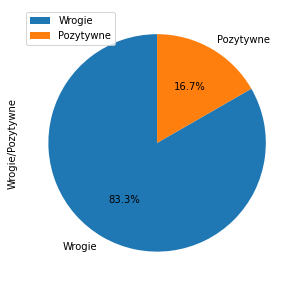

In [381]:
df.plot.pie(y='Wrogie/Pozytywne',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

<h2>Który polityk miał najwięcej wrogich twetów? Średnia z twetow<h2>

In [382]:
df2=df1.groupby('author_id', as_index=False)['Subjectivityy'].mean()
df2

,author_id,Subjectivityy
0,Bosak,-0.466319
1,Budka,-0.355423
2,Holownia,-0.353689
3,Jaki,-0.350946
4,Korwin,-0.380979
5,Kurski,-0.370328
6,Lubnauer,-0.323475
7,Macierewicz,-0.330356
8,Pawłowicz,-0.158677
9,Sasin,-0.334657


Text(0, 0.5, 'wartość')

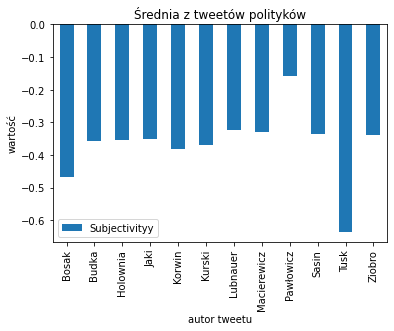

In [383]:
df2.plot(x ='author_id', y='Subjectivityy', kind = 'bar')
plt.title('Średnia z tweetów polityków')
plt.xlabel('autor tweetu')
plt.ylabel('wartość')

<h2>A teraz stosunek wrogich i przyjaznych tweetów u każdego z polityków <h2>

In [384]:
df1['wrogie/przyjazne']=np.where(df1['Subjectivityy']>=0, 'Pozytywny', 'Wrogi')
df1

,created_at,id,text,author_id,Subjectivityy,wrogie/przyjazne
0,2022-03-18T23:07:47.000Z,1504957769232916480,W pewnym sensie zbrodnicze porządki,Macierewicz,-0.099615,Wrogi
1,2022-03-18T23:04:56.000Z,1504957051717496840,Gdzie raport smoleński od mitomana Macierew...,Macierewicz,-0.679716,Wrogi
2,2022-03-18T23:03:40.000Z,1504956730781937667,Na dowódcę proponuję naczelnego szpiona Puti...,Macierewicz,-0.009365,Wrogi
3,2022-03-18T22:55:27.000Z,1504954664227418123,Czy chcesz wraz z ogrodowym krasnalem wywoła...,Macierewicz,-0.592188,Wrogi
4,2022-03-18T22:47:54.000Z,1504952764333531137,Ruski szpieg atakuje PL UE NATO za pomocą a...,Macierewicz,-0.701079,Wrogi
...,...,...,...,...,...,...
1097,2022-03-19T11:51:53.000Z,1505150058903351302,Ja też uwielbiam słuchać Sikorskiego o Rosj...,Lubnauer,0.487208,Pozytywny
1098,2022-03-19T11:48:43.000Z,1505149263742918657,Tusk bezpieczeństwo krajupowiedzia...,Lubnauer,-0.694842,Wrogi
1099,2022-03-19T11:46:09.000Z,1505148619304939527,Wielki sukces Donalda Tuska na kon...,Lubnauer,-0.294606,Wrogi
1100,2022-03-19T11:44:05.000Z,1505148095885156360,Lub paralmentu europejskiego by na...,Lubnauer,-0.370172,Wrogi


In [385]:
df1['Wrogi']=np.where(df1['wrogie/przyjazne']=='Wrogi', 1, 0)
df1['Pozytywny']=np.where(df1['wrogie/przyjazne']=='Pozytywny', 1, 0)
df1

,created_at,id,text,author_id,Subjectivityy,wrogie/przyjazne,Wrogi,Pozytywny
0,2022-03-18T23:07:47.000Z,1504957769232916480,W pewnym sensie zbrodnicze porządki,Macierewicz,-0.099615,Wrogi,1,0
1,2022-03-18T23:04:56.000Z,1504957051717496840,Gdzie raport smoleński od mitomana Macierew...,Macierewicz,-0.679716,Wrogi,1,0
2,2022-03-18T23:03:40.000Z,1504956730781937667,Na dowódcę proponuję naczelnego szpiona Puti...,Macierewicz,-0.009365,Wrogi,1,0
3,2022-03-18T22:55:27.000Z,1504954664227418123,Czy chcesz wraz z ogrodowym krasnalem wywoła...,Macierewicz,-0.592188,Wrogi,1,0
4,2022-03-18T22:47:54.000Z,1504952764333531137,Ruski szpieg atakuje PL UE NATO za pomocą a...,Macierewicz,-0.701079,Wrogi,1,0
...,...,...,...,...,...,...,...,...
1097,2022-03-19T11:51:53.000Z,1505150058903351302,Ja też uwielbiam słuchać Sikorskiego o Rosj...,Lubnauer,0.487208,Pozytywny,0,1
1098,2022-03-19T11:48:43.000Z,1505149263742918657,Tusk bezpieczeństwo krajupowiedzia...,Lubnauer,-0.694842,Wrogi,1,0
1099,2022-03-19T11:46:09.000Z,1505148619304939527,Wielki sukces Donalda Tuska na kon...,Lubnauer,-0.294606,Wrogi,1,0
1100,2022-03-19T11:44:05.000Z,1505148095885156360,Lub paralmentu europejskiego by na...,Lubnauer,-0.370172,Wrogi,1,0


In [386]:
wrogie.df=df1.groupby(['author_id']).apply(lambda x: x[x['Pozytywny'] == 0 ]['Wrogi'].sum())
wrogie.df

C:\Users\weron\AppData\Local\Temp/ipykernel_1452/2579766697.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wrogie.df=df1.groupby(['author_id']).apply(lambda x: x[x['Pozytywny'] == 0 ]['Wrogi'].sum())


author_id
Bosak          92
Budka          78
Holownia       86
Jaki           82
Korwin         89
Kurski         83
Lubnauer       77
Macierewicz    78
Pawłowicz      94
Sasin          80
Tusk            2
Ziobro         77
dtype: int64

In [387]:
pozytywne.df=df1.groupby(['author_id']).apply(lambda x: x[x['Pozytywny'] == 1 ]['Pozytywny'].sum())

pozytywne.df

C:\Users\weron\AppData\Local\Temp/ipykernel_1452/67708892.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pozytywne.df=df1.groupby(['author_id']).apply(lambda x: x[x['Pozytywny'] == 1 ]['Pozytywny'].sum())


author_id
Bosak           8
Budka          22
Holownia       14
Jaki           18
Korwin         11
Kurski         17
Lubnauer       23
Macierewicz    22
Pawłowicz       6
Sasin          20
Tusk            0
Ziobro         23
dtype: int64

In [388]:
pozytywne_df = pd.DataFrame(pozytywne.df)
wrogie_df = pd.DataFrame(wrogie.df)

pozytywne_df

,0
author_id,
Bosak,8
Budka,22
Holownia,14
Jaki,18
Korwin,11
Kurski,17
Lubnauer,23
Macierewicz,22
Pawłowicz,6


In [389]:
wrogie_df

,0
author_id,
Bosak,92
Budka,78
Holownia,86
Jaki,82
Korwin,89
Kurski,83
Lubnauer,77
Macierewicz,78
Pawłowicz,94


In [390]:
df4=wrogie_df.merge(pozytywne_df, how='left', on='author_id')

In [391]:
df4

,0_x,0_y
author_id,,
Bosak,92,8
Budka,78,22
Holownia,86,14
Jaki,82,18
Korwin,89,11
Kurski,83,17
Lubnauer,77,23
Macierewicz,78,22
Pawłowicz,94,6


In [392]:
df4.columns

Index(['0_x', '0_y'], dtype='object')

In [393]:

df4.columns=["Wrogie", "Pozytywne"]

In [394]:
df4

,Wrogie,Pozytywne
author_id,,
Bosak,92,8
Budka,78,22
Holownia,86,14
Jaki,82,18
Korwin,89,11
Kurski,83,17
Lubnauer,77,23
Macierewicz,78,22
Pawłowicz,94,6


Text(0, 0.5, 'wartość')

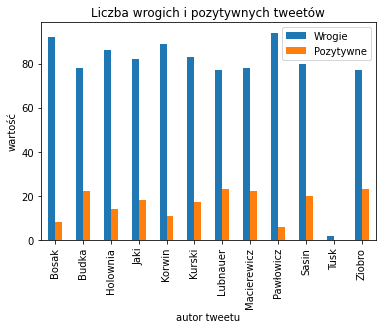

In [395]:
df4.plot(kind='bar',y=['Wrogie','Pozytywne'])
plt.title('Liczba wrogich i pozytywnych tweetów')
plt.xlabel('autor tweetu')
plt.ylabel('wartość')

<h5>Z tego wynika że na profilu Zobro jest najwiecej wrogich tweetów ale np. na profilu Tuska nie ma zadnego pozytywnego<h5>

<h1>Analiza sentymentów <h1>

Teraz zajmiemy się tworzeniem prawdziwego modelu ML. Uzyje do tego pobranych juz wcesniej danych, ktore pochodza od polskich politykow, podziele dane na treningowe i testowe.Juz wczesniej do danych dodalam czy byly pozytywne czy negatywne


Proponowany przez nas system ma za zadanie zidentyfikować mowę nienawiści w wyodrębnionych tweetach. Będziemy kategoryzować tweety  jako mowę nienawiści, jeśli z danym tweetem związane są negatywne odczucia. Zatem naszym zadaniem jest sklasyfikowanie negatywnych tweetów  z ogółu tweetów. Na początku dzielimy cały zbiór danych na dwa typy (treningowy i testowy). 


Następnie budujemy model za pomocą algorytmu regresji logistycznej. Po treningu model przewiduje negatywne i nienegatywne tweety w zbiorze danych testowych, oznaczając je etykietami 0 lub 1. 

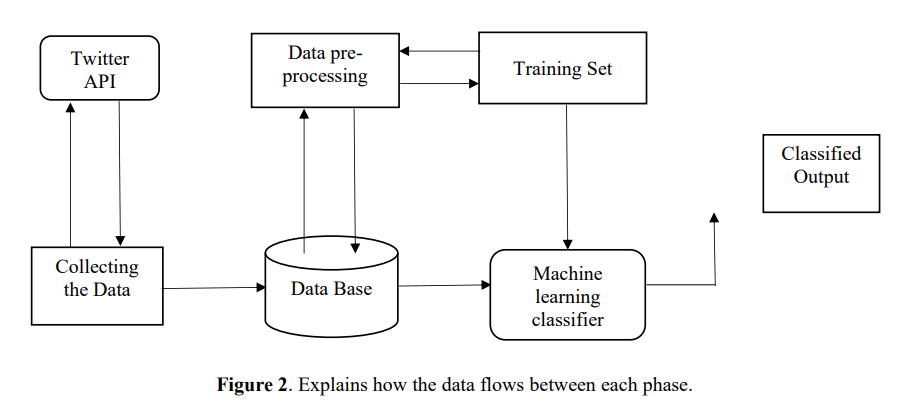

<h2>Chmura wyrazów <h2>

Trzeba tu zainstalowac pakiet wordloud.Uwaga!Moze byc potrzebna instalacja Miscrosoft Visual Studio jesli go nie masz.

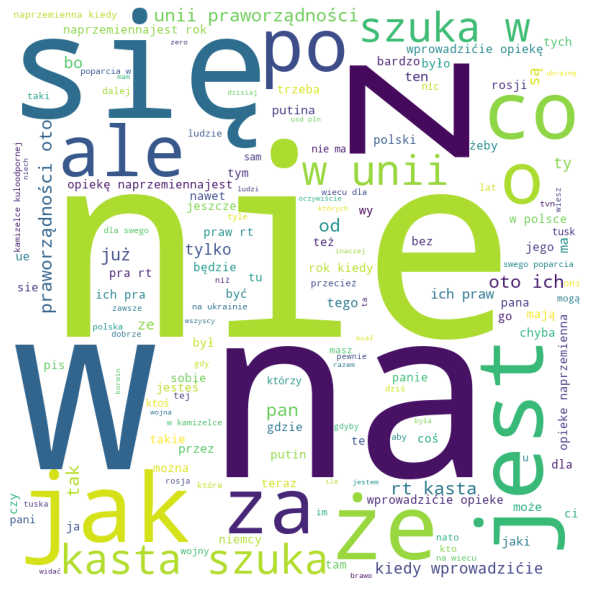

In [396]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df1
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df1.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<h1>Najważniejsza część-stworzenie algorytmu Maschine Learning <h1>

In [397]:
df1.tail()

,created_at,id,text,author_id,Subjectivityy,wrogie/przyjazne,Wrogi,Pozytywny
1097,2022-03-19T11:51:53.000Z,1505150058903351302,Ja też uwielbiam słuchać Sikorskiego o Rosj...,Lubnauer,0.487208,Pozytywny,0,1
1098,2022-03-19T11:48:43.000Z,1505149263742918657,Tusk bezpieczeństwo krajupowiedzia...,Lubnauer,-0.694842,Wrogi,1,0
1099,2022-03-19T11:46:09.000Z,1505148619304939527,Wielki sukces Donalda Tuska na kon...,Lubnauer,-0.294606,Wrogi,1,0
1100,2022-03-19T11:44:05.000Z,1505148095885156360,Lub paralmentu europejskiego by na...,Lubnauer,-0.370172,Wrogi,1,0
1101,2022-03-19T11:43:26.000Z,1505147933498486784,Chcesz żeby echo wybiło jej zęby,Lubnauer,-0.717628,Wrogi,1,0


<h2>Podział na zbiór treningowy i testowy <h2>

In [398]:
X=df1['text']
y=df1['Pozytywny']

In [399]:
X

0                  W pewnym sensie  zbrodnicze porządki  
1          Gdzie raport smoleński od mitomana Macierew...
2         Na dowódcę proponuję naczelnego szpiona Puti...
3         Czy chcesz wraz z ogrodowym krasnalem wywoła...
4         Ruski szpieg  atakuje PL UE NATO za pomocą a...
                              ...                        
1097       Ja też uwielbiam słuchać Sikorskiego o Rosj...
1098                Tusk bezpieczeństwo krajupowiedzia...
1099                Wielki sukces Donalda Tuska na kon...
1100                Lub paralmentu europejskiego by na...
1101                    Chcesz żeby echo wybiło jej zęby 
Name: text, Length: 1102, dtype: object

In [400]:
y[480]

0

<h2>Dzielimy typowo w stosunku 80/20 <h2>

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state =26105111)

<h2>Wektoryzacja za pomocą TF-IDF Vectorizer<h2>

Większość algorytmów uczenia maszynowego jest wypełniona matematyką, taką jak statystyka, algebra, rachunek itp. Oczekują one, że dane będą liczbowe, takie jak dwuwymiarowa tablica z wierszami jako instancjami i kolumnami jako cechami. Problem z językiem naturalnym polega na tym, że dane mają postać surowego tekstu, który należy przekształcić w wektor. Proces przekształcania tekstu w wektor jest powszechnie nazywany wektoryzacją tekstu. Jest to podstawowy proces w przetwarzaniu języka naturalnego, ponieważ żaden z algorytmów uczenia maszynowego nie rozumie tekstu, nawet komputery. W przekształcaniu tekstu na wektory może pomóc algorytm wektoryzacji tekstu, czyli wektoryzator TF-IDF, który jest bardzo popularnym podejściem do tradycyjnych algorytmów uczenia maszynowego.

<h2>TF-IDF<h2>


Term frequency-inverse document frequency to wektoryzator tekstu, który przekształca tekst w użyteczny wektor. Łączy on w sobie dwa pojęcia: częstotliwość terminów (TF) i częstotliwość dokumentów (DF).
Częstotliwość terminów to liczba wystąpień danego terminu w dokumencie. Częstotliwość terminów wskazuje, jak ważny jest dany termin w dokumencie. Częstotliwość terminów przedstawia każdy tekst z danych jako macierz, której wiersze to liczba dokumentów, a kolumny to liczba różnych terminów we wszystkich dokumentach.


Częstotliwość dokumentów to liczba dokumentów zawierających określony termin. Częstotliwość dokumentu wskazuje, jak często występuje dany termin.
Inverse document frequency (IDF) to waga terminu, która ma na celu zmniejszenie wagi terminu, jeśli jego wystąpienia są rozproszone we wszystkich dokumentach



<h2>TF-IDF Vectorizer<h2>

In [418]:
vectoriser = TfidfVectorizer(ngram_range=(1,3), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  15289


<h2>Co to są n-gramy<h2>


N-gramy to ciągłe sekwencje słów, symboli lub tokenów w dokumencie. W sensie technicznym można je zdefiniować jako sąsiadujące ze sobą sekwencje elementów w dokumencie. Znajdują one zastosowanie, gdy mamy do czynienia z danymi tekstowymi w zadaniach NLP (Natural Language Processing).Pewnie zastanawiasz się teraz, dlaczego potrzebujemy wielu różnych typów n-gramów! Dzieje się tak dlatego, że różne typy n-gramów nadają się do różnych zastosowań. Należy wypróbować różne n-gramy na swoich danych, aby móc stwierdzić, który z nich najlepiej nadaje się do analizy tekstu. Na przykład badania wykazały, że w przypadku filtrowania spamu najlepiej sprawdzają się trygramy i 4 gramy.Z powyższej tabeli jasno wynika, że unigram oznacza branie tylko jednego słowa naraz, bigram oznacza branie dwóch słów naraz, a trygram - trzech słów naraz. Na tym blogu zajmiemy się wyłącznie trigramami. Zachęcamy do dalszego zgłębiania wiedzy o 4 gramach, 5 gramach itd. na podstawie wniosków wyciągniętych z tego bloga!

<h3>Transform the data using TF-IDF Vectorizer<h3>



In [419]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

<h3>Regresja logistyczna<h3>

In [420]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [421]:
y_train

734    0
109    0
84     0
621    0
505    1
      ..
249    0
385    0
616    1
833    0
413    0
Name: Pozytywny, Length: 661, dtype: int32

In [430]:
y_test

160    0
246    1
748    1
834    0
375    0
      ..
538    1
253    0
903    0
359    0
847    0
Name: Pozytywny, Length: 441, dtype: int32

In [431]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [432]:
X_test

<441x15289 sparse matrix of type '<class 'numpy.float64'>'
	with 4195 stored elements in Compressed Sparse Row format>

<h2>Regresja logistyczna <h2>

In [435]:
def model_Evaluate(model):
# Predict values for Test dataset
   y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
   print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
   cf_matrix = confusion_matrix(y_test, y_pred)
   categories = ['Negative','Positive']
   group_names = ['True Neg','False Pos', 'False Neg','True Pos']
   group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
   labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
   xticklabels = categories, yticklabels = categories)
   plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
   plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
   plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       1.00      0.04      0.08        70

    accuracy                           0.85       441
   macro avg       0.92      0.52      0.50       441
weighted avg       0.87      0.85      0.78       441



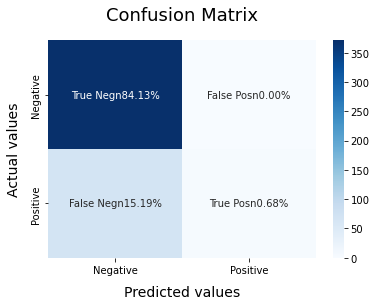

In [436]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

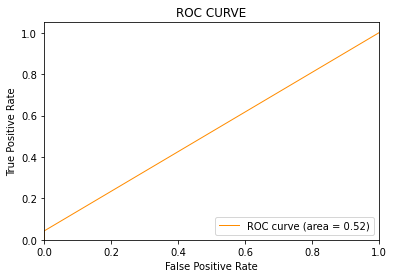

In [437]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<h2>Bernoulli<h2>

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       1.00      0.04      0.08        70

    accuracy                           0.85       441
   macro avg       0.92      0.52      0.50       441
weighted avg       0.87      0.85      0.78       441



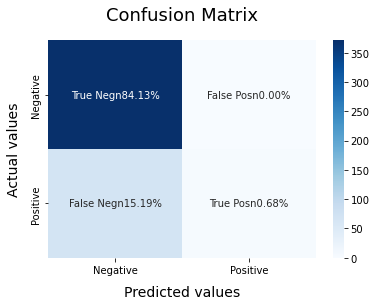

In [438]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

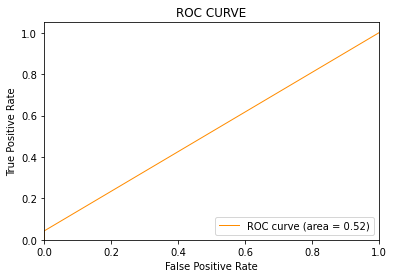

In [439]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<h2>Linear SVc<h2>

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       371
           1       0.78      0.10      0.18        70

    accuracy                           0.85       441
   macro avg       0.82      0.55      0.55       441
weighted avg       0.84      0.85      0.80       441



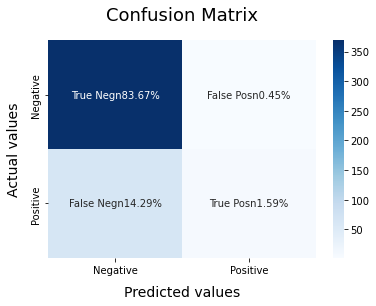

In [440]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

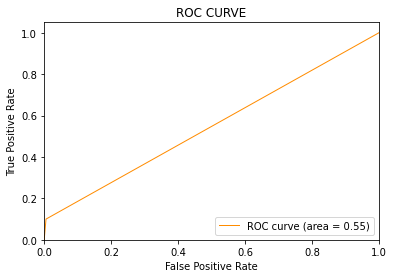

In [441]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Podsumowanie:ostatni model jest najlepszy

<h2>Macierz konfuzji<h2>

Macierz konfuzji to macierz (tabela), którą można wykorzystać do pomiaru wydajności algorytmu uczenia maszynowego, zwykle uczenia nadzorowanego. Każdy wiersz macierzy konfuzji reprezentuje przypadki klasy rzeczywistej, a każda kolumna przypadki klasy przewidywanej.<br>
Obliczenie macierzy konfuzji pozwala zorientować się, gdzie model klasyfikacyjny ma rację i jakie błędy popełnia.
Macierz konfuzji służy do sprawdzania wydajności modelu klasyfikacyjnego na zestawie danych testowych, dla których znane są prawdziwe wartości. Na podstawie macierzy konfuzji oblicza się większość miar wydajności, takich jak precyzja i wycofanie.


Po wytrenowaniu modelu stosujemy środki oceny, aby sprawdzić, jak działa model. W związku z tym do sprawdzenia wydajności modeli używamy następujących parametrów oceny:

Wynik dokładności
Macierz konfuzji z wykresem
Krzywa ROC-AUC

<h3>Krzywa ROC <h3>

Zbudowałeś swój model uczenia maszynowego - co dalej? Musisz go ocenić i zweryfikować, jak dobry (lub zły) jest, abyś mógł zdecydować, czy go wdrożyć. W tym celu należy posłużyć się krzywą AUC-ROC.
    
Na razie wystarczy wiedzieć, że krzywa AUC-ROC pomaga nam wizualizować, jak dobrze radzi sobie nasz klasyfikator uczenia maszynowego. Chociaż działa ona tylko dla problemów klasyfikacji binarnej, pod koniec zobaczymy, jak można ją rozszerzyć, aby ocenić również problemy klasyfikacji wieloklasowej.


Co to jest krzywa AUC-ROC?
Krzywa ROC (Receiver Operator Characteristic) jest metryką oceny dla problemów klasyfikacji binarnej. Jest to krzywa prawdopodobieństwa, która wykreśla TPR względem FPR przy różnych wartościach progowych i zasadniczo oddziela "sygnał" od "szumu". Obszar pod krzywą (AUC) jest miarą zdolności klasyfikatora do rozróżniania klas i jest wykorzystywany jako podsumowanie krzywej ROC.

Im wyższa wartość AUC, tym lepsza skuteczność modelu w rozróżnianiu klas pozytywnych i negatywnych.
    


Gdy AUC = 1, klasyfikator jest w stanie doskonale rozróżnić wszystkie punkty klasy dodatniej i ujemnej. Gdyby jednak AUC wynosił 0, wówczas klasyfikator przewidywałby wszystkie punkty ujemne jako dodatnie, a wszystkie dodatnie jako ujemne.Gdy '0,5<AUC<1', istnieje duża szansa, że klasyfikator będzie w stanie odróżnić wartości klasy pozytywnej od wartości klasy negatywnej. Dzieje się tak, ponieważ klasyfikator jest w stanie wykryć większą liczbę wyników prawdziwie pozytywnych i prawdziwie negatywnych niż wyników fałszywie negatywnych i fałszywie pozytywnych.

<h2>PODSUMOWANIE<h2>

Podsumowując, dokonalismy przede wszystkim ciekawego przeglądu tweetów polskich polityków. Webscraping strony jaką jest tweeter dał mi dużo radości. Nastepnie 
pokazalismy, który z wybranych polskich polityków jest najbardziej wrogi i pryzyjazny,zastosowalismy algorytmy zdolne do przewidzenia 
kolejnych wrogich i pozytywnych tweetow oraz spojrzelismy na wydajnosc tych modeli. Oczywiscie nie sa one idealne i mozna tu np. zastosowac algorytm XBoost. Warto jednak podkreslic ze nad kazdym modelem na githubie bede jescze pracowac, poniewaz
finalnie planuję stworzyc kanał na YT gdzie będę dzielić się takimi ciekawostkami-nie udawajmy, każdy był ciekawy czy K.Pawłowicz czy J.K.Mikke wygra wyścig o najbardziej wrogiego tweeta!